In [6]:
import pandas as pd
import numpy as np


In [7]:
df1 = pd.read_excel(r"C:\Users\pc\Downloads\data.xlsx", sheet_name = 0)

In [8]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,#6,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,4.23,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,5.07,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,5.91,United Kingdom


In [9]:
df2 = pd.read_excel(r"C:\Users\pc\Downloads\data.xlsx", sheet_name = 1)

In [10]:
df2.head()

,InvoiceNo,CustomerID
0,536365,17850.0
1,536365,17850.0
2,536365,17850.0
3,536365,17850.0
4,536365,17850.0


# Structural Errors

In [13]:
df1["Quantity"] = df1["Quantity"].replace(r'[#*&]','',regex = True).astype('int16')


In [14]:
df1["Quantity"]

0       6
1       6
2       8
3       6
4       6
       ..
229    24
230    24
231    24
232    48
233    96
Name: Quantity, Length: 234, dtype: int16

# Transformation¶

In [16]:
df1["Quantity"].mean(),df1["Quantity"].median()

(23.22222222222222, 6.0)

In [17]:
df1['Quantity'].isna().sum()

0

In [18]:
df1['Quantity'].fillna(df1['Quantity'],inplace = True)

In [ ]:
!pip install matplotlib

In [ ]:
!pip install scipy

In [21]:
df1['log_Quantity'] = np.log(df1['Quantity'])


C:\Users\pc\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: ylabel='Density'>

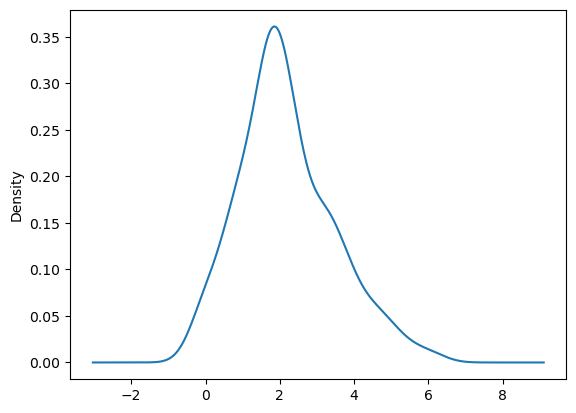

In [22]:
df1['log_Quantity'].plot(kind = 'kde')

In [23]:
df1['sqrt_Quantity'] = np.sqrt(df1['Quantity'])

C:\Users\pc\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: ylabel='Density'>

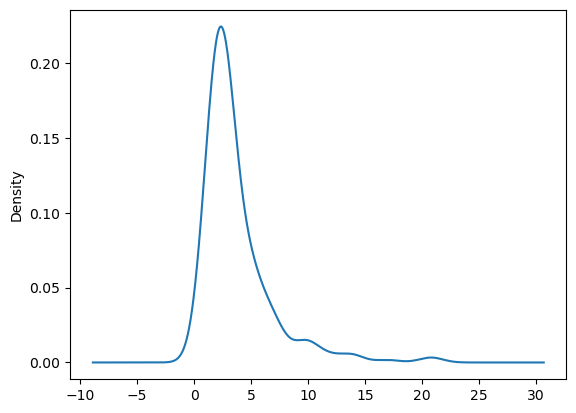

In [24]:
df1['sqrt_Quantity'].plot(kind = 'kde')

In [ ]:
import numpy as np

In [32]:
df1['reciprocal_Quantity'] = np.reciprocal(df1['Quantity'])

<Axes: ylabel='Density'>

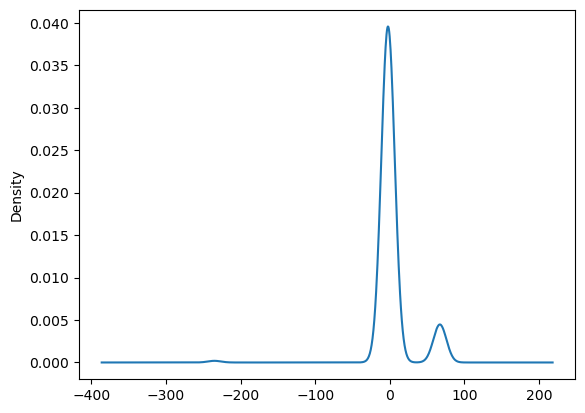

In [33]:
df1['reciprocal_Quantity'].plot(kind = 'kde')

# Standardization

In [26]:
def stand(x):
    n = (x - df1["Quantity"].mean())/df1["Quantity"].std()
    return n

In [27]:
df1["Quantity"] = df1["Quantity"].apply(stand)
df1["Quantity"]

0     -0.329666
1     -0.329666
2     -0.291383
3     -0.329666
4     -0.329666
         ...   
229    0.014888
230    0.014888
231    0.014888
232    0.474294
233    1.393106
Name: Quantity, Length: 234, dtype: float64

# Concatenate and Merging

In [28]:
pd.concat([df1,df2],axis=0,ignore_index=True)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,log_Quantity,sqrt_Quantity,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.329666,2.55,United Kingdom,1.791759,2.449490,NaN
1,536365,71053,WHITE METAL LANTERN,-0.329666,3.39,United Kingdom,1.791759,2.449490,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,-0.291383,4.23,United Kingdom,2.079442,2.828427,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,-0.329666,5.07,United Kingdom,1.791759,2.449490,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,-0.329666,5.91,United Kingdom,1.791759,2.449490,NaN
...,...,...,...,...,...,...,...,...,...
542138,581587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12680.0
542139,581587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12680.0
542140,581587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12680.0
542141,581587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12680.0


In [29]:
pd.concat([df1,df2],axis=1,ignore_index=True)

,0,1,2,3,4,5,6,7,8,9
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.329666,2.55,United Kingdom,1.791759,2.449490,536365,17850.0
1,536365,71053,WHITE METAL LANTERN,-0.329666,3.39,United Kingdom,1.791759,2.449490,536365,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,-0.291383,4.23,United Kingdom,2.079442,2.828427,536365,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,-0.329666,5.07,United Kingdom,1.791759,2.449490,536365,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,-0.329666,5.91,United Kingdom,1.791759,2.449490,536365,17850.0
...,...,...,...,...,...,...,...,...,...,...
541904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,581587,12680.0
541905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,581587,12680.0
541906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,581587,12680.0
541907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,581587,12680.0


In [30]:
pd.merge(df1,df2,on="InvoiceNo",how="inner")

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,log_Quantity,sqrt_Quantity,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.329666,2.55,United Kingdom,1.791759,2.449490,17850.0
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.329666,2.55,United Kingdom,1.791759,2.449490,17850.0
2,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.329666,2.55,United Kingdom,1.791759,2.449490,17850.0
3,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.329666,2.55,United Kingdom,1.791759,2.449490,17850.0
4,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.329666,2.55,United Kingdom,1.791759,2.449490,17850.0
...,...,...,...,...,...,...,...,...,...
4064,536390,22969,HOMEMADE JAM SCENTED CANDLES,1.393106,1.25,United Kingdom,4.564348,9.797959,17511.0
4065,536390,22969,HOMEMADE JAM SCENTED CANDLES,1.393106,1.25,United Kingdom,4.564348,9.797959,17511.0
4066,536390,22969,HOMEMADE JAM SCENTED CANDLES,1.393106,1.25,United Kingdom,4.564348,9.797959,17511.0
4067,536390,22969,HOMEMADE JAM SCENTED CANDLES,1.393106,1.25,United Kingdom,4.564348,9.797959,17511.0


In [31]:
pd.merge(df1,df2,on="InvoiceNo",how="outer")

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,log_Quantity,sqrt_Quantity,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.329666,2.55,United Kingdom,1.791759,2.44949,17850.0
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.329666,2.55,United Kingdom,1.791759,2.44949,17850.0
2,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.329666,2.55,United Kingdom,1.791759,2.44949,17850.0
3,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.329666,2.55,United Kingdom,1.791759,2.44949,17850.0
4,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.329666,2.55,United Kingdom,1.791759,2.44949,17850.0
...,...,...,...,...,...,...,...,...,...
545738,581587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12680.0
545739,581587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12680.0
545740,581587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12680.0
545741,581587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12680.0
